#**EMAIL SPAM CLASSIFIER**

<a id="top"></a>
<div style="text-align: center; background: #ff8c00; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">🚀 SMS Spam Classification: Detecting Unwanted Messages 🚀</div>
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*mbFBPcPUJD-53v3h.png">
</div>

**INTRODUCTION**

**The SMS Spam Collection Dataset is a well-known dataset widely used for spam detection in text messages. It consists of a set of SMS messages that are labeled as either "spam" or "ham" (non-spam). The dataset is often used for training machine learning models to automatically classify incoming text messages as either spam or not spam.**

**About Dataset**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of **5,574 messages**, tagged acording being ham (not spam) or spam.

**Content**

The files contain one message per line. Each line is composed by two columns: **v1 contains the label (ham or spam) and v2 contains the raw text**.

This corpus has been collected from free or free for research sources at the Internet:
The original dataset can be found on

link: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

**Problem Statement:**

**Develop a machine learning or  model that can effectively classify incoming SMS messages as either spam or not spam. The model should be trained on a labeled dataset of SMS messages, where each message is tagged with its corresponding class label (spam or not spam). The goal is to create a  classification system that accurately identifies spam messages or not spam**

**Challenges**

**Can you use this dataset to build a prediction model that will accurately classify which texts are spam?**

#**Importing the Necessary Libraries**

In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#**loading the data**

In [310]:
df=pd.read_csv("/content/spam.csv",encoding="latin-1")

In [311]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Assessing the data**

In [312]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [313]:
df.shape

(5572, 5)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Data Cleaning**

**dropping unwanted columns**

In [315]:
#droping last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [316]:
#Rename the columns name
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [317]:
#checking for duplicate values
df.duplicated().sum()

403

In [318]:
#removing the duplicates values
df=df.drop_duplicates()

In [319]:
df.shape

(5169, 2)

**we have 403 duplcate values we will remove it**

In [320]:
#checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

**There is no missing values**

**lets convert the target values into 0 as ham and 1 as spam**

In [321]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["target"]=le.fit_transform(df["target"])

In [322]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Exploratory Data Analysis**

**Percentage of Ham and Spam**

In [323]:
df["target"].value_counts()/len(df)*100

target
0    87.366996
1    12.633004
Name: count, dtype: float64

**87% of our data has no spam and 12% contains spam**

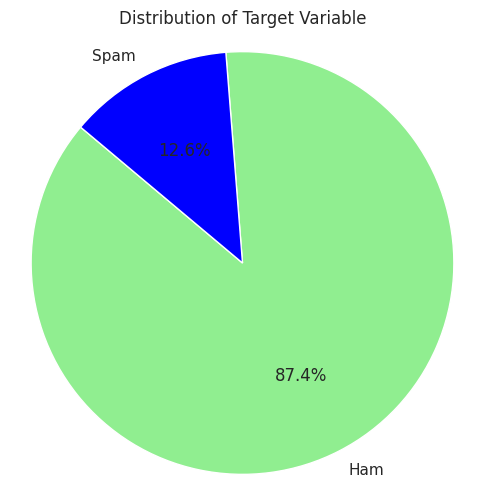

In [324]:
value_counts = df["target"].value_counts()

# Calculate percentage of each category
percentages = value_counts / len(df) * 100

# Plotting
plt.figure(figsize=(6,6))
plt.pie(percentages, labels=["Ham","Spam"], autopct='%1.1f%%', startangle=140,colors=["lightgreen","blue"])
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Data is Imbalanced**

In [325]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [326]:
#num of characters
df["num_character"]=df["text"].apply(len)

In [327]:
df.head(2)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [328]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [329]:
df.head(2)

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [330]:
#num of sentences
df["num_sentences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [331]:
df.head(3)

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [332]:
#descriptive stats of a dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,5169.0,0.126330,0.332253,0.0,0.0,0.0,0.0,1.0
num_character,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


In [333]:
#stats for not spam
df[df['target']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
target,4516.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
num_character,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


In [334]:
#stats for spam
df[df['target']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
target,653.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
num_character,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


**we can see that spam has more character,words and sentences so if the email contains more sentences then we can assumes that it is a spam email**

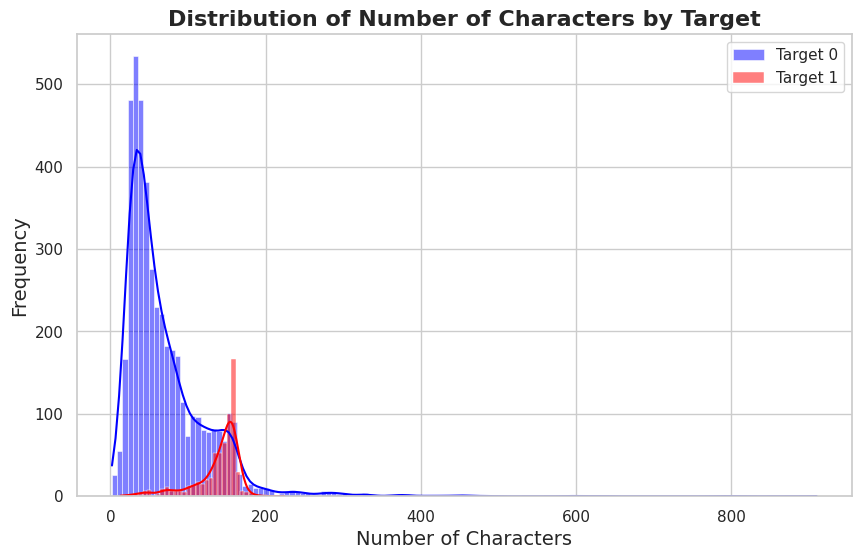

In [335]:

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_character'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_character'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

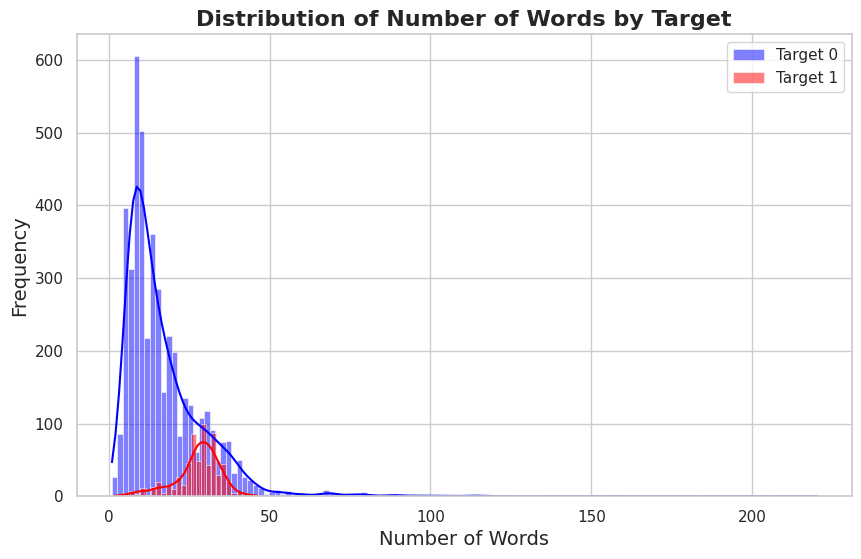

In [336]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

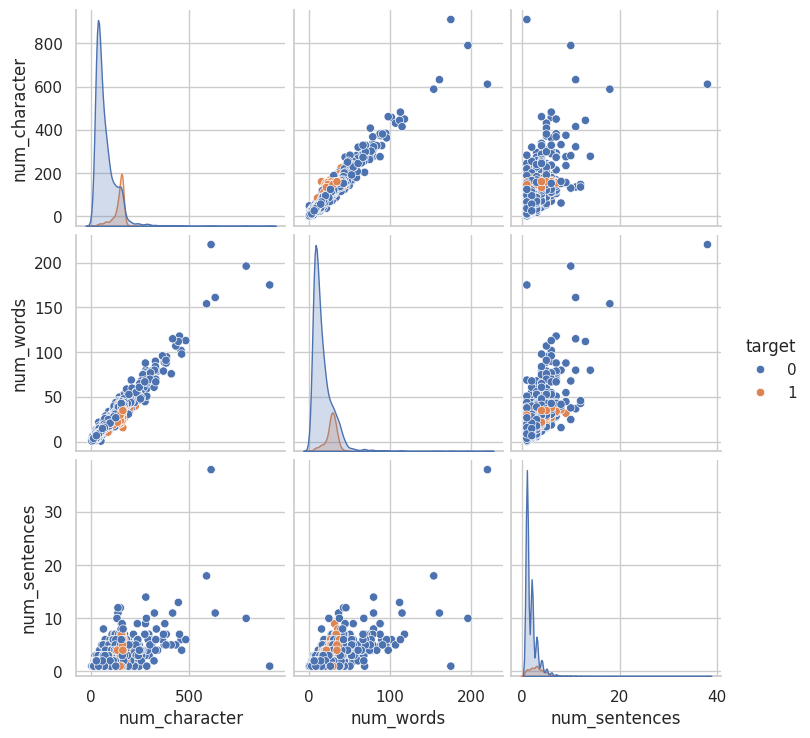

In [337]:
sns.pairplot(df,hue="target")

<Axes: >

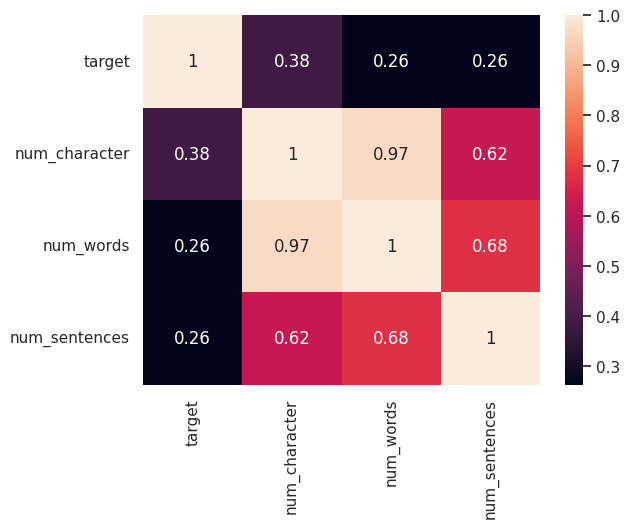

In [338]:
sns.heatmap(df[['target','num_character', 'num_words', 'num_sentences']].corr(),annot=True)

#**Data Preprocessing**

text preprocessing is mostly done in
1. Lower_case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [339]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [340]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [341]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [342]:
def transform_text(text):
  text = text.lower()
  text =nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [343]:
transform_text("HI HOW ARE %% YOU AWAZ? I would Loved to meet you")

'hi awaz would love meet'

In [344]:
df["transformed_text"]=df["text"].apply(transform_text)

In [345]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [346]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

In [347]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

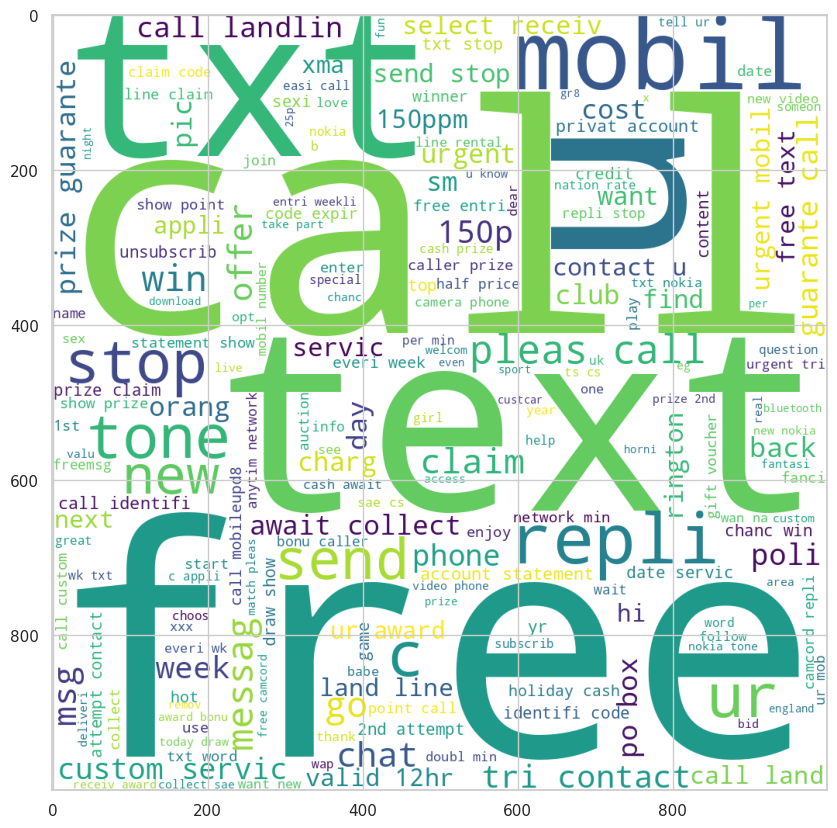

In [348]:
plt.figure(figsize=(10,15))
plt.imshow(spam_wc)

In [349]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

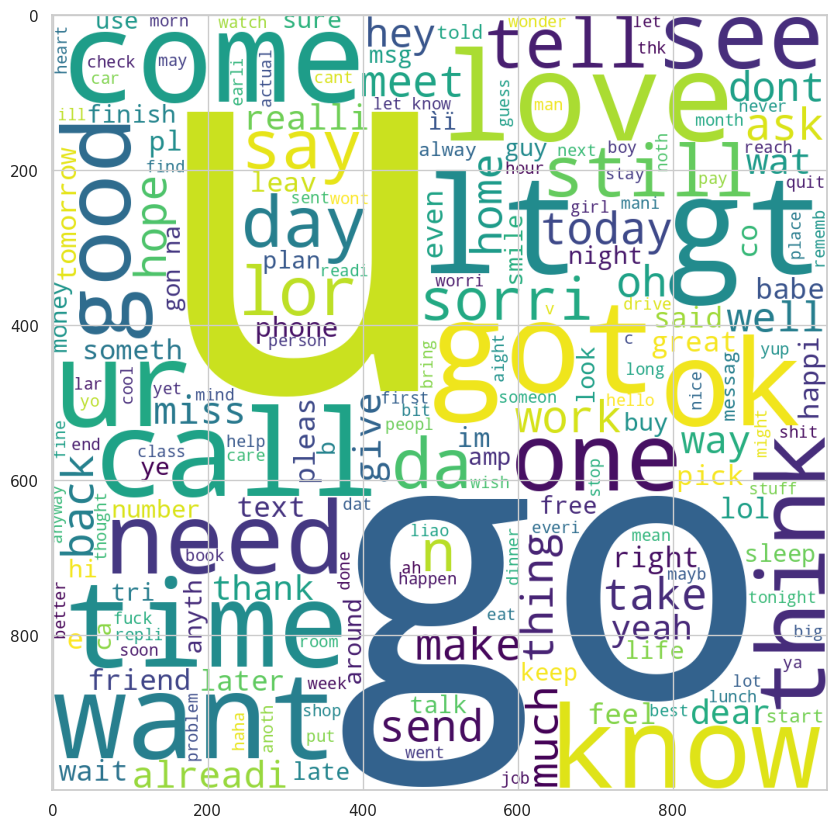

In [350]:
plt.figure(figsize=(10,15))
plt.imshow(ham_wc)

In [351]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [352]:
len(spam_corpus)

9939

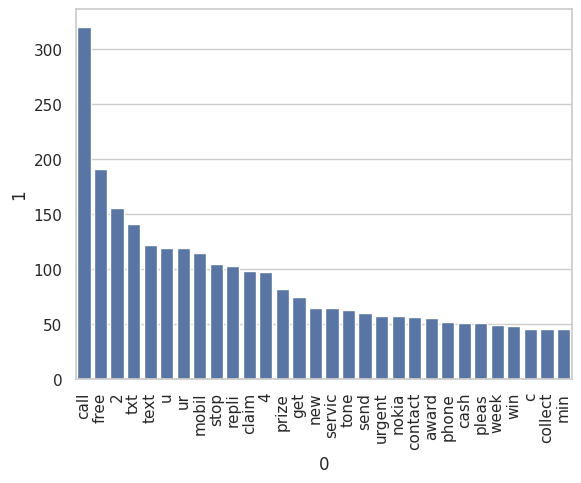

In [353]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [354]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [355]:
len(ham_corpus)

35404

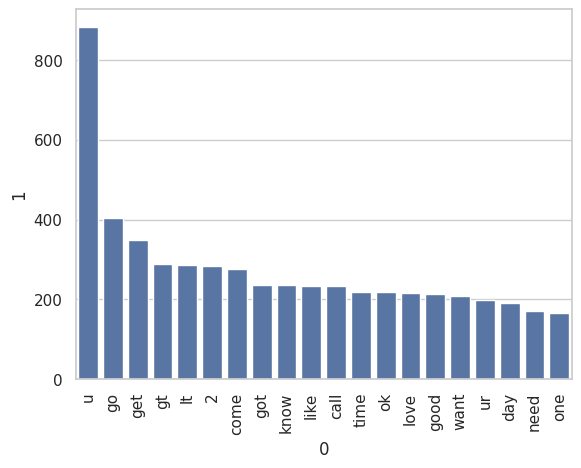

In [356]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(20))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation=90)
plt.show()

**Model Building**

In [357]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [358]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [359]:
X.shape

(5169, 6708)

In [360]:
y = df['target'].values

In [361]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [414]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [415]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [416]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [417]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [368]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test )
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


**Split into Train and Test Data**

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

**now lets look at the different Machine Learning Models**

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

**Initialize the models**

In [371]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
gbdt = GradientBoostingClassifier()
xgb  = XGBClassifier()

**Dictionary of Models**

In [372]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'GBDT': gbdt,
    'xgb': xgb

}

**Train the Models**

In [373]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [374]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828

For:  KNN
Accuracy:  0.9003868471953579
Precision:  1.0

For:  NB
Accuracy:  0.9593810444874274
Precision:  1.0

For:  DT
Accuracy:  0.9352030947775629
Precision:  0.8380952380952381

For:  LR
Accuracy:  0.9516441005802708
Precision:  0.94

For:  RF
Accuracy:  0.971953578336557
Precision:  1.0

For:  GBDT
Accuracy:  0.960348162475822
Precision:  0.9369369369369369

For:  xgb
Accuracy:  0.9748549323017408
Precision:  0.9375


**Support Vector Classifier (SVC) and Random Forest (RF) and Naive Bayes demonstrated the highest accuracy, both achieving approximately 95%++ with precision as 1.**

In [377]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
dt = DecisionTreeClassifier()

from sklearn.ensemble import VotingClassifier

In [378]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('dt', dt)],voting='soft')

In [379]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [380]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9827586206896551


In [381]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('dt', dt)]
final_estimator=RandomForestClassifier()

In [382]:
from sklearn.ensemble import StackingClassifier

In [383]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [384]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9461538461538461


In [418]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

#**prediction**

In [426]:
# Load the vectorizer and model
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))

# Function to make prediction
def predict_spam(message):
    # Preprocess the input text
    message_vectorized = vectorizer.transform([message])
    # Make prediction
    prediction = model.predict(message_vectorized)
    return prediction[0]

# Get input from the user
user_input = input("Enter a message: ")

# Make prediction
prediction = predict_spam(user_input)
if prediction == 1:
    print("This message is Spam")
else:
    print("This message is not Spam")

Enter a message: hi namaste i would love to meet you
This message is not Spam


#**Web app**

In [440]:
import streamlit as st
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

vectorizer = pickle.load(open("vectorizer.pkl","rb"))
model = pickle.load(open("model.pkl","rb"))

def transform_text(text):
  text = text.lower()
  text =nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

#function to make prediction
def predict_spam(message):
    transformed_text = transform_text(message)
    message_vectorized = vectorizer.transform([transformed_text])
    prediction = model.predict(message_vectorized)
    return prediction[0]


st.title("Email/SMS Spam Classifier")

st.write("Enter a message to determine if its a spam or not spam:")

#input text box for user to enter message
user_input=st.text_input("Enter message here:")

#button to tigger prediction
if st.button("predict"):
    if user_input:
        prediction = predict_spam(user_input)
        if prediction == 1:
            st.write("This message is Spam")
        else:
            st.write("This Message is not Spam")
    else:
        st.write("please enter a Message")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
